In [2]:
from google.colab import files
uploaded = files.upload()

Saving deutsche_bank_financial_performance.csv to deutsche_bank_financial_performance.csv


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import numpy as np
from scipy.stats import norm


df_performance = pd.read_csv('deutsche_bank_financial_performance.csv')

In [20]:
print(df_performance)

          Date  Operating_Income    Expenses        Assets   Liabilities  \
0     1/1/2015        4370861.07  3682573.85  1.363403e+08  1.494296e+08   
1     1/2/2015        9556428.76  1186425.69  1.955172e+08  4.725052e+07   
2     1/3/2015        7587945.48  3093297.62  1.519954e+08  1.756590e+08   
3     1/4/2015        6387926.36  3230217.71  2.097483e+08  1.382626e+08   
4     1/5/2015        2404167.76  2408588.02  8.124073e+07  2.773058e+08   
..         ...               ...         ...           ...           ...   
795   3/6/2017        8849115.18  3102741.13  2.056449e+08  2.121410e+08   
796   3/7/2017        9389064.54  1733723.00  1.195069e+08  3.776259e+08   
797   3/8/2017        6086198.65   857387.16  6.145149e+07  3.530014e+08   
798   3/9/2017        7269857.41   885462.12  3.406201e+08  5.897583e+07   
799  3/10/2017        9302494.43  4523858.94  3.366060e+08  1.692377e+08   

          Equity      Revenue   Cash_Flow  Net_Income  Debt_to_Equity   ROA  \
0    598

In [22]:
display(df_performance.head())


,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,1/1/2015,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,1/2/2015,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,1/3/2015,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,1/4/2015,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,1/5/2015,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51


In [23]:
print(df_performance.columns)

Index(['Date', 'Operating_Income', 'Expenses', 'Assets', 'Liabilities',
       'Equity', 'Revenue', 'Cash_Flow', 'Net_Income', 'Debt_to_Equity', 'ROA',
       'Profit_Margin', 'Interest_Expense', 'Tax_Expense', 'Dividend_Payout'],
      dtype='object')


In [24]:
correlation_matrix = df_performance.corr(numeric_only=True)

In [25]:
numeric_df = df_performance.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

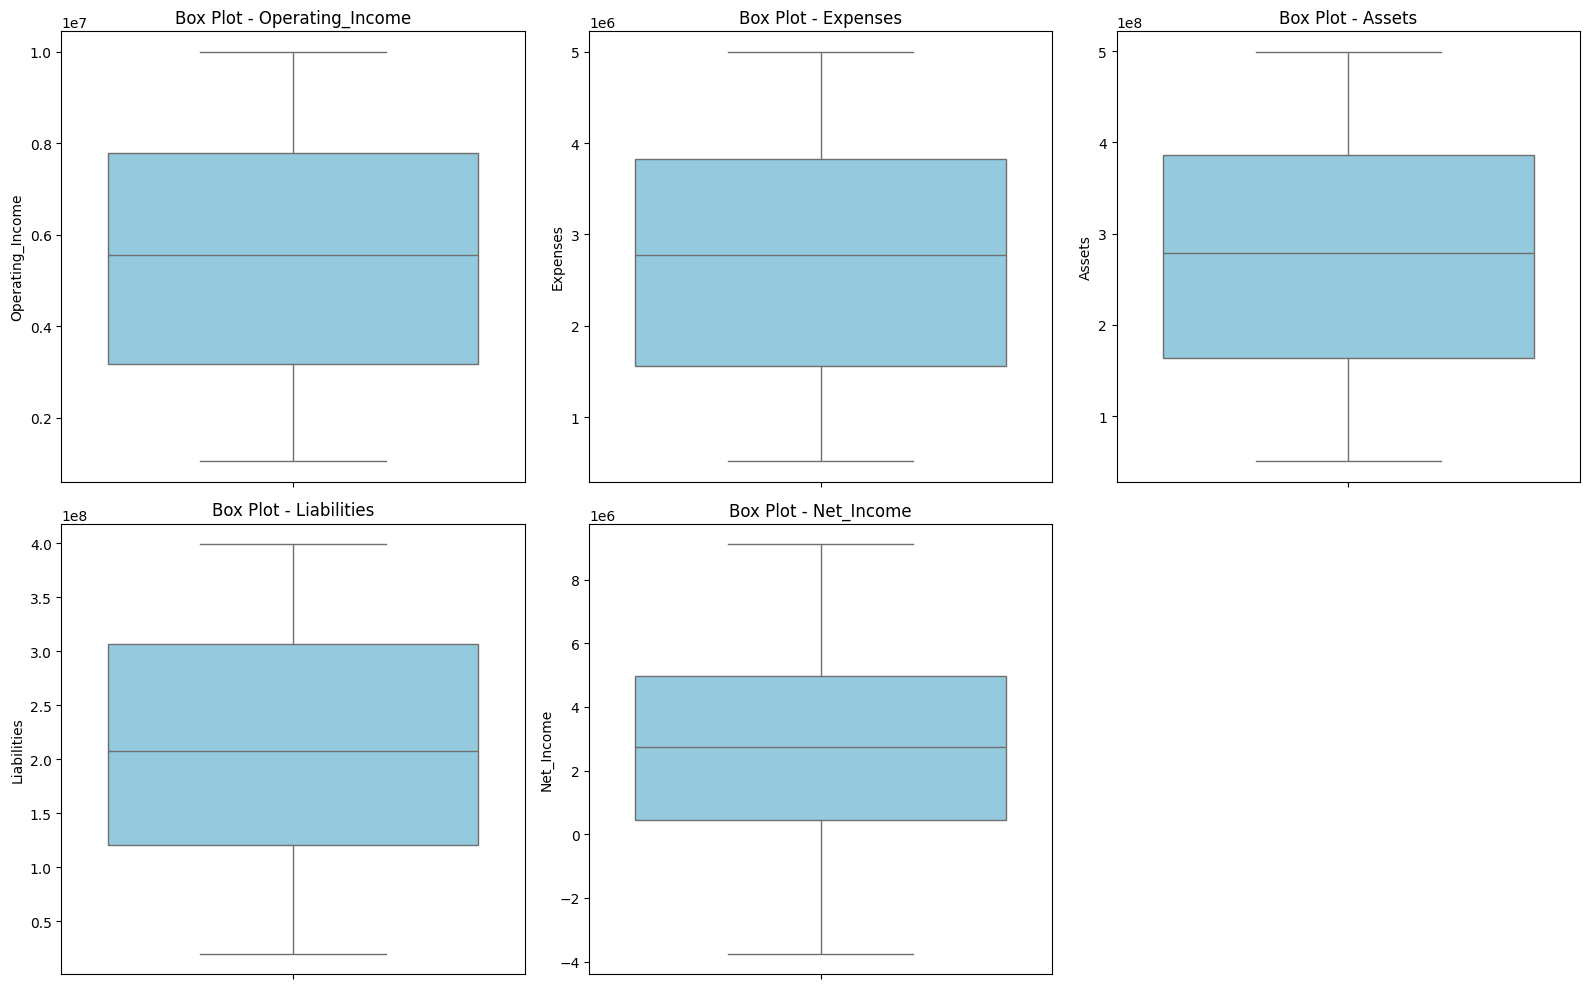

In [26]:
#Box Plots
plt.figure(figsize=(16, 10))

boxplot_columns = ['Operating_Income', 'Expenses', 'Assets', 'Liabilities', 'Net_Income']

for i, col in enumerate(boxplot_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_performance[col], color='skyblue')
    plt.title(f'Box Plot - {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

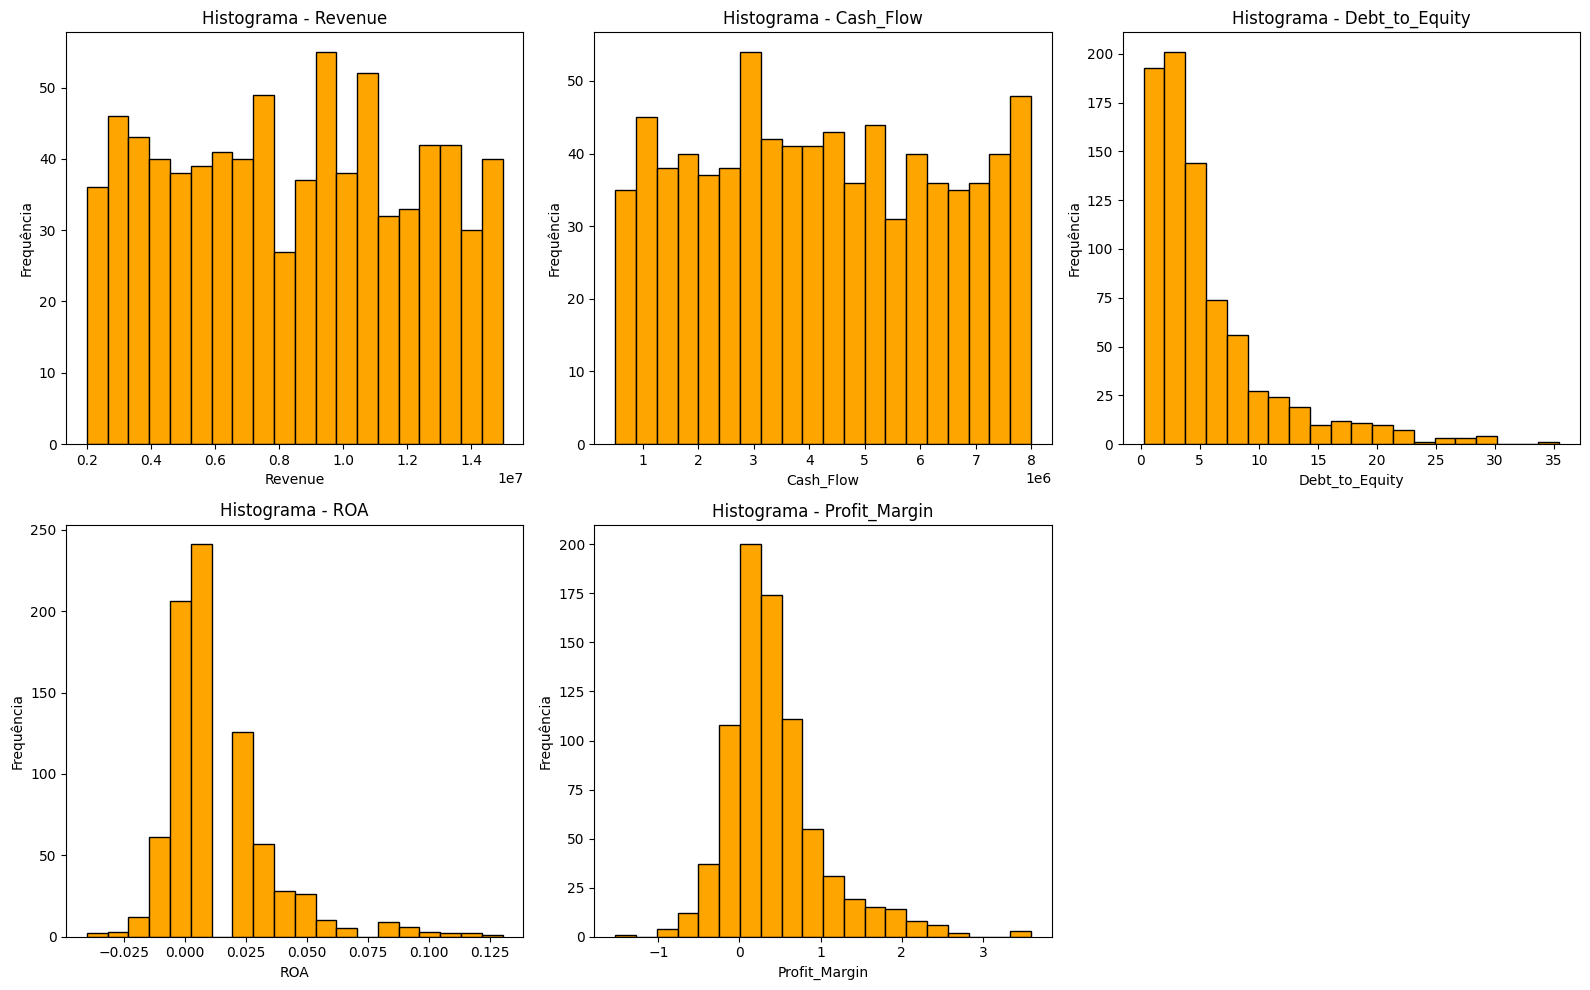

In [27]:
#Histogramas
plt.figure(figsize=(16, 10))

hist_columns = ['Revenue', 'Cash_Flow', 'Debt_to_Equity', 'ROA', 'Profit_Margin']

for i, col in enumerate(hist_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_performance[col], bins=20, color='orange', edgecolor='black')
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

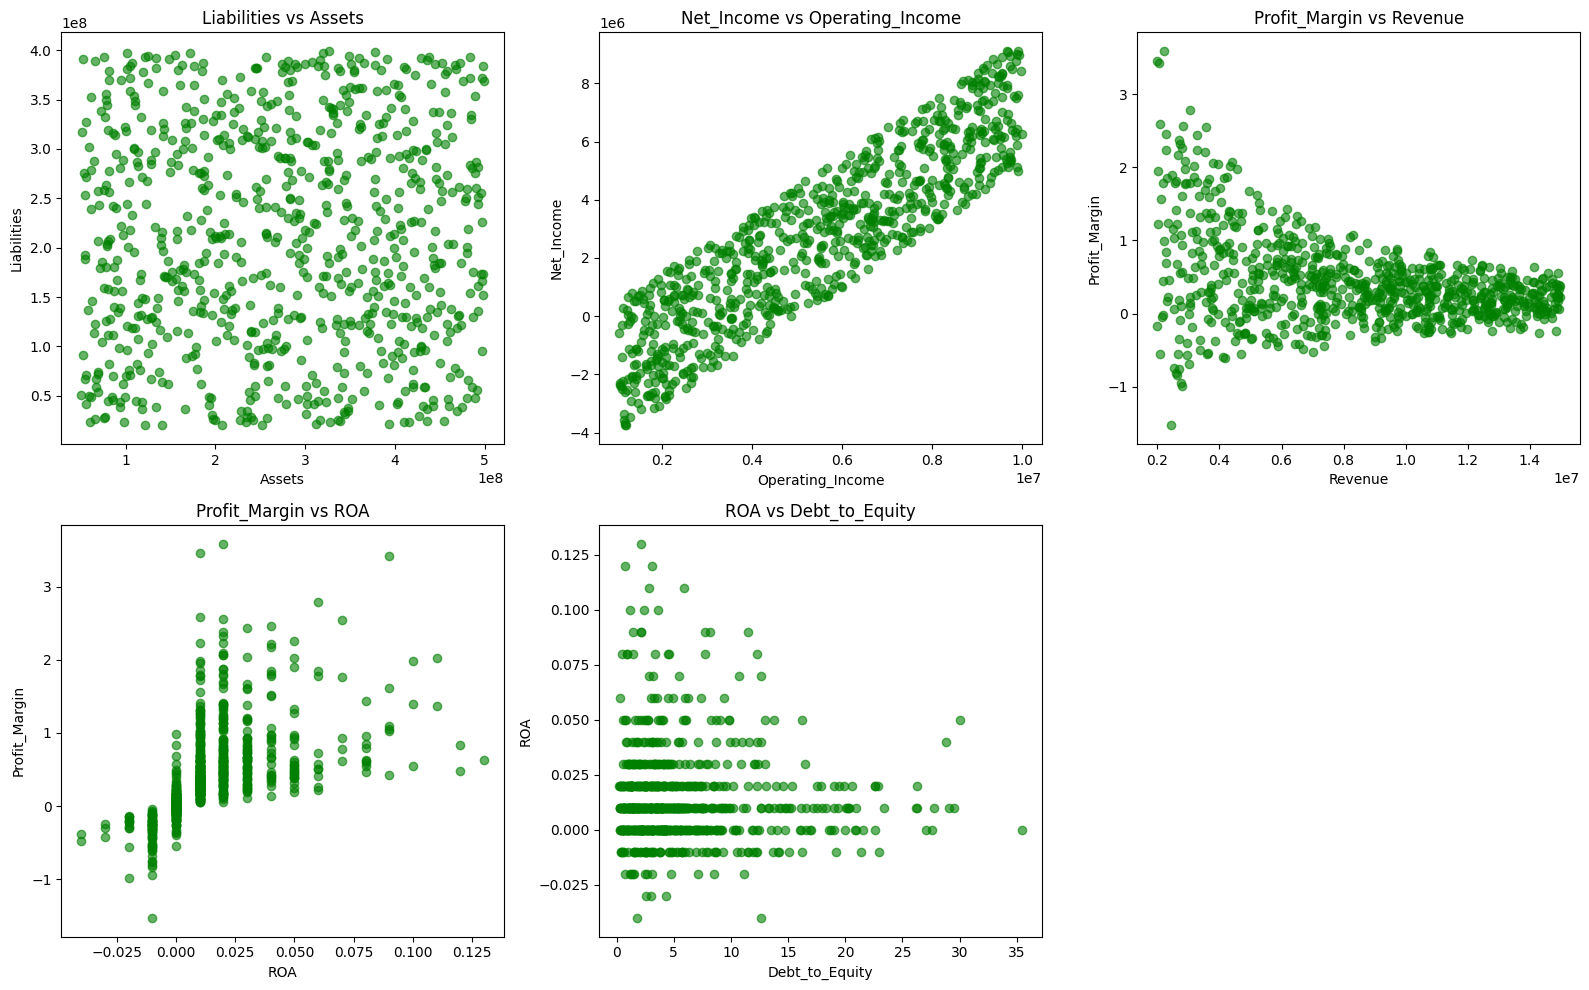

In [28]:
#Scatter plot
plt.figure(figsize=(16, 10))

scatter_pairs = [
    ('Assets', 'Liabilities'),
    ('Operating_Income', 'Net_Income'),
    ('Revenue', 'Profit_Margin'),
    ('ROA', 'Profit_Margin'),
    ('Debt_to_Equity', 'ROA')
]

for i, (x, y) in enumerate(scatter_pairs):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df_performance[x], df_performance[y], alpha=0.6, color='green')
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

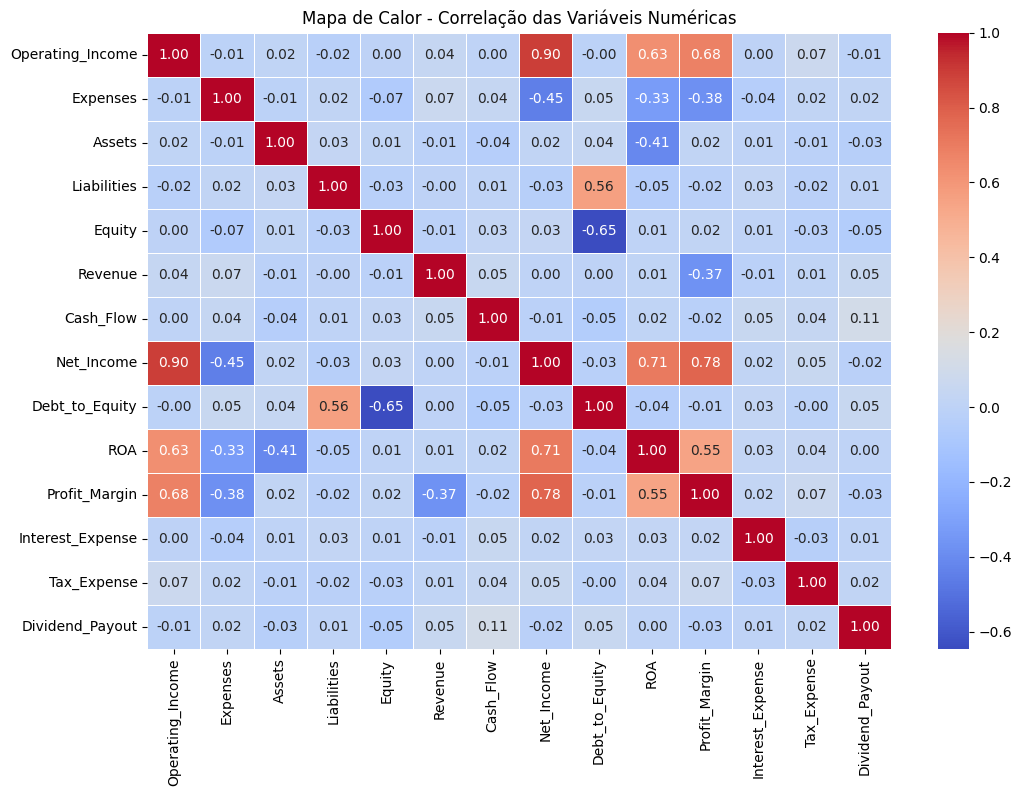

In [29]:
#Mapa de Calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor - Correlação das Variáveis Numéricas')
plt.show()

In [30]:
#Normal Padrão

cols_to_normalize = ['Net_Income', 'Assets']

scaler = StandardScaler()

normalized_values = scaler.fit_transform(df_performance[cols_to_normalize])

df_normalized = pd.DataFrame(normalized_values, columns=[f'{col}_Zscore' for col in cols_to_normalize])

df_result = pd.concat([df_performance[cols_to_normalize], df_normalized], axis=1)

display(df_result.head(10))

,Net_Income,Assets,Net_Income_Zscore,Assets_Zscore
0,688287.22,1.363403e+08,-0.686982,-1.068966
1,8370003.06,1.955172e+08,1.907787,-0.611109
2,4494647.86,1.519954e+08,0.598750,-0.947841
3,3157708.65,2.097483e+08,0.147152,-0.501001
4,-4420.26,8.124073e+07,-0.920968,-1.495277
5,-1410048.38,2.835769e+08,-1.395768,0.070218
6,-3181899.06,8.042565e+07,-1.994273,-1.501584
7,4130527.00,4.101604e+08,0.475755,1.049607
8,3881257.93,1.551704e+08,0.391556,-0.923276
9,6363081.99,2.930054e+08,1.229879,0.143167


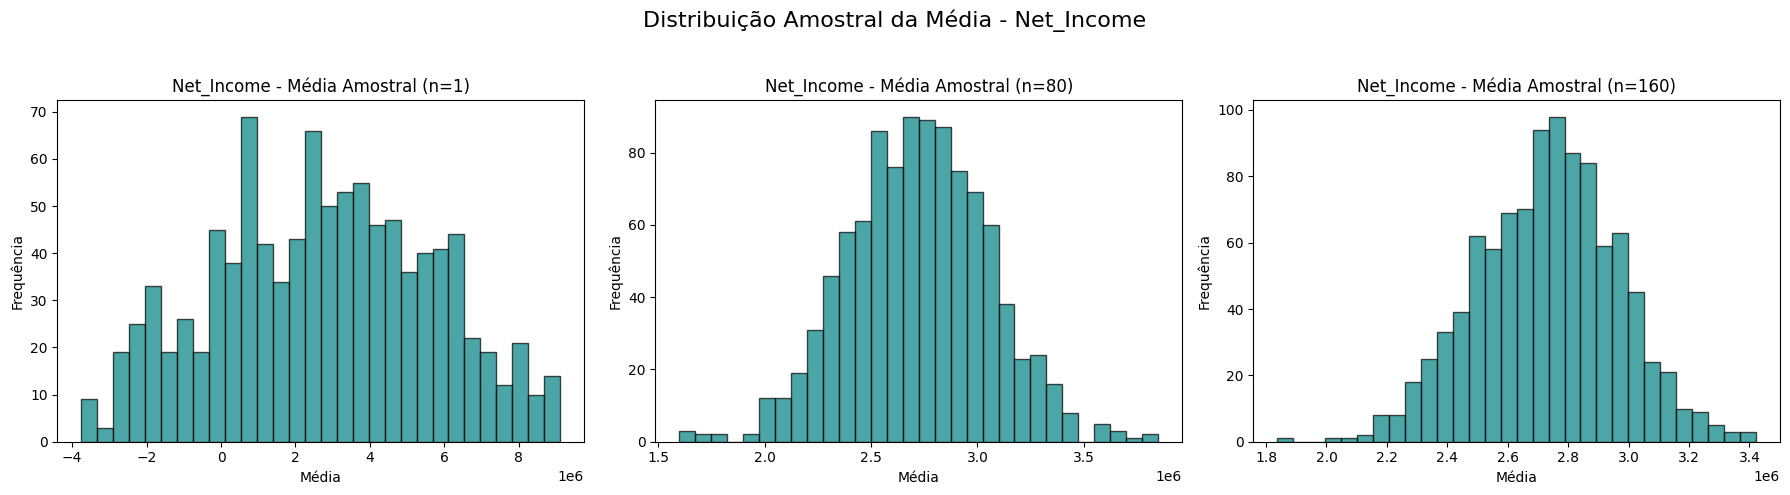

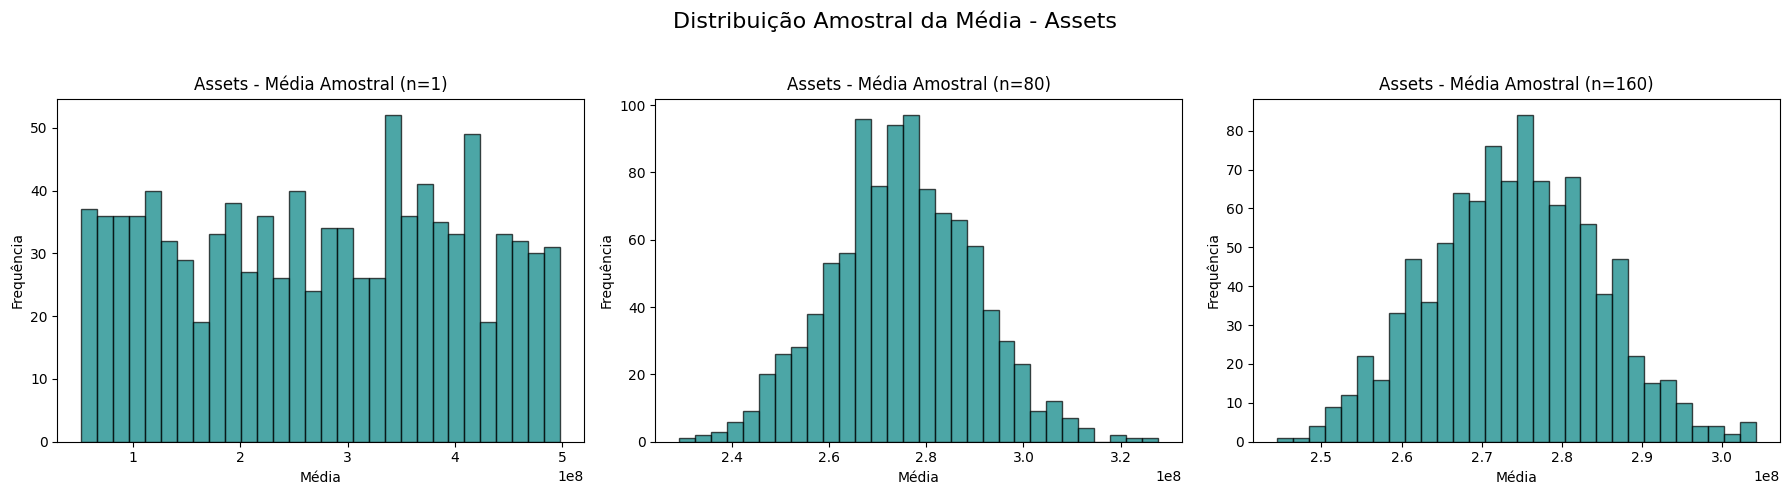

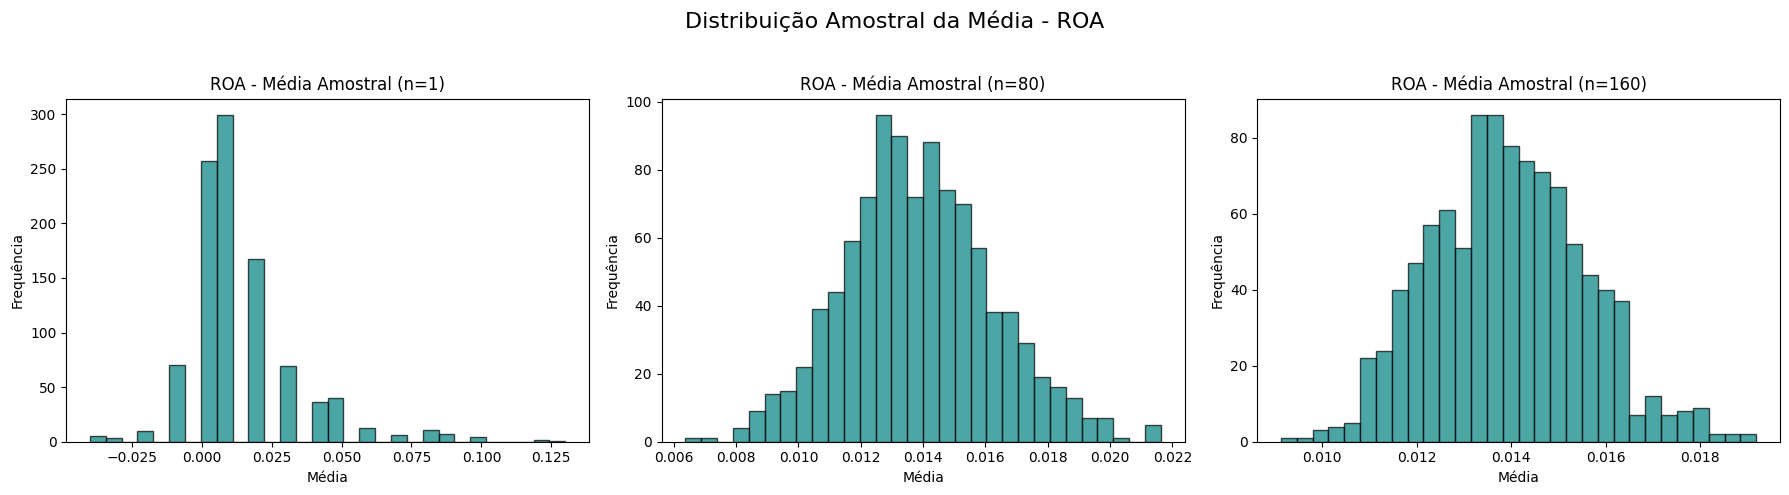

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sampling_distribution(data, variable, sample_sizes, n_simulations=1000):
    plt.figure(figsize=(18, 5))

    for i, size in enumerate(sample_sizes):
        means = []
        for _ in range(n_simulations):
            sample = np.random.choice(data[variable].dropna(), size=size, replace=True)
            means.append(np.mean(sample))

        plt.subplot(1, len(sample_sizes), i + 1)
        plt.hist(means, bins=30, color='teal', edgecolor='black', alpha=0.7)
        plt.title(f'{variable} - Média Amostral (n={size})')
        plt.xlabel('Média')
        plt.ylabel('Frequência')

    plt.suptitle(f'Distribuição Amostral da Média - {variable}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

n_pop = len(df_performance)
sample_sizes = [1, n_pop // 10, n_pop // 5]

variables = ['Net_Income', 'Assets', 'ROA']

for var in variables:
    plot_sampling_distribution(df_performance, var, sample_sizes)


Média amostral de Net_Income: 2722071.23
IC 90%: 2549799.71 até 2894342.74
IC 95%: 2516797.05 até 2927345.40


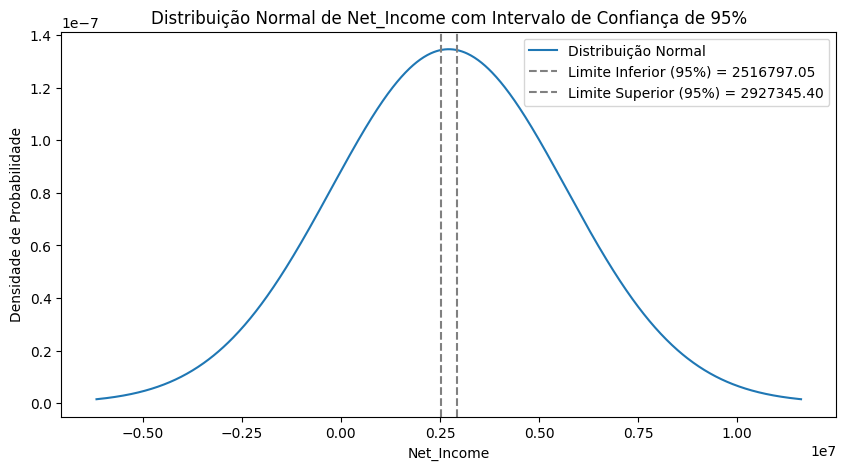

In [32]:
#Intervalo de Confiança


variavel = 'Net_Income'
amostra = df_performance[variavel].dropna()

media = np.mean(amostra)
desvio = np.std(amostra, ddof=1)
n = len(amostra)
epm = desvio / np.sqrt(n)

z_90 = stats.norm.ppf(0.95)
z_95 = stats.norm.ppf(0.975)

ic_90 = (media - z_90 * epm, media + z_90 * epm)
ic_95 = (media - z_95 * epm, media + z_95 * epm)

print(f'Média amostral de {variavel}: {media:.2f}')
print(f'IC 90%: {ic_90[0]:.2f} até {ic_90[1]:.2f}')
print(f'IC 95%: {ic_95[0]:.2f} até {ic_95[1]:.2f}')

x_valores = np.linspace(media - 3*desvio, media + 3*desvio, 1000)
y_valores = norm.pdf(x_valores, media, desvio)

plt.figure(figsize=(10, 5))
plt.plot(x_valores, y_valores, label='Distribuição Normal')

plt.axvline(x=ic_95[0], color='grey', linestyle='--', label=f'Limite Inferior (95%) = {ic_95[0]:.2f}')
plt.axvline(x=ic_95[1], color='grey', linestyle='--', label=f'Limite Superior (95%) = {ic_95[1]:.2f}')

plt.title(f'Distribuição Normal de {variavel} com Intervalo de Confiança de 95%')
plt.xlabel(variavel)
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()